# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/boy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [3]:
# Choisir une année
year = 1914

In [4]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"tin drame de famille. — Tué,pâr:riJh père, • ^. ETCHARPE&. SKUN6S VERITABLES, ' Un‘des chanteurs français, lefi -jribs pôpu-.; 4#-cfiotx, &)%’mitais'; LILIV; m~, rivale, : ïàli^;-HtfiW'‘Pottî;i)lo?}cq"

In [10]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [11]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"tin drame de famille. — Tué,pâr:riJh père, • ^. ETCHARPE&. SKUN6S VERITABLES, ' Un‘des chanteurs français, lefi -jribs pôpu-.; 4#-cfiotx, &)%’mitais'; LILIV; m~, rivale, : ïàli^;-HtfiW'‘Pottî;i)lo?}cqnniuiço^^e.ift,€nf6j.ae.: c J ‘ ■ 1 - - * . * wiaw4 litni* /ïnr\\-û Æûa -nttf/irtïT^lJl^flC .1 1 • Fragson,* est mort liier,dans des cireaitatahces y ' tragiques. Il a été tué d’un coup de revolver !* ‘par son père, un vieillard;-de': 84 fttavfi’ant .^rftge-a altéré les facultés 1 meot&lesr ‘ ' ' 1 •"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [12]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [13]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1914_clean.txt!'

In [14]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'TIN DRAME FAMILLE TUÉ PÂR RIJH PÈRE ETCHARPE VERITABLES CHANTEURS FRANÇAIS LEFI JRIBS PÔPU CFIOTX MITAIS LILIV RIVALE ÏÀLI HTFIW POTTÎ CQNNIUIÇO IFT LITNI ÏNR ÆÛA NTTF IRTÏT LJL FLC FRAGSON MORT LIIER CIREAITATAHCES TRAGIQUES TUÉ COUP REVOLVER PÈRE VIEILLARD FTTAVFI ANT RFTGE ALTÉRÉ FACULTÉS MEOT LESR VOICI COMMENT DRAME FAMILLE TFÔST PRODUIT FRAGSON OECUPAITAVEC SOB DÈTTJ AFTPAM MENT RUE FAYETTE PARLA VIEILLARD ÉTÛTT TRÈS IRRITABLE AUEINTD SORTE FÔÏIEÉÉ NJIE PRENANT FORME DÉLIREDE JYQRSÉCD ITIO'

## Nuage de mots

### Afficher les termes les plus fréquents


In [15]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('RUE', 4103), ('BRUXELLES', 1452), ('PRIX', 1038), ('ANS', 998), ('MAISON', 960), ('LOUER', 932), ('BON', 865), ('DÉS', 809), ('FILLE', 771), ('TRÈS', 736)]


### Créer, stocker et afficher le nuage de mots

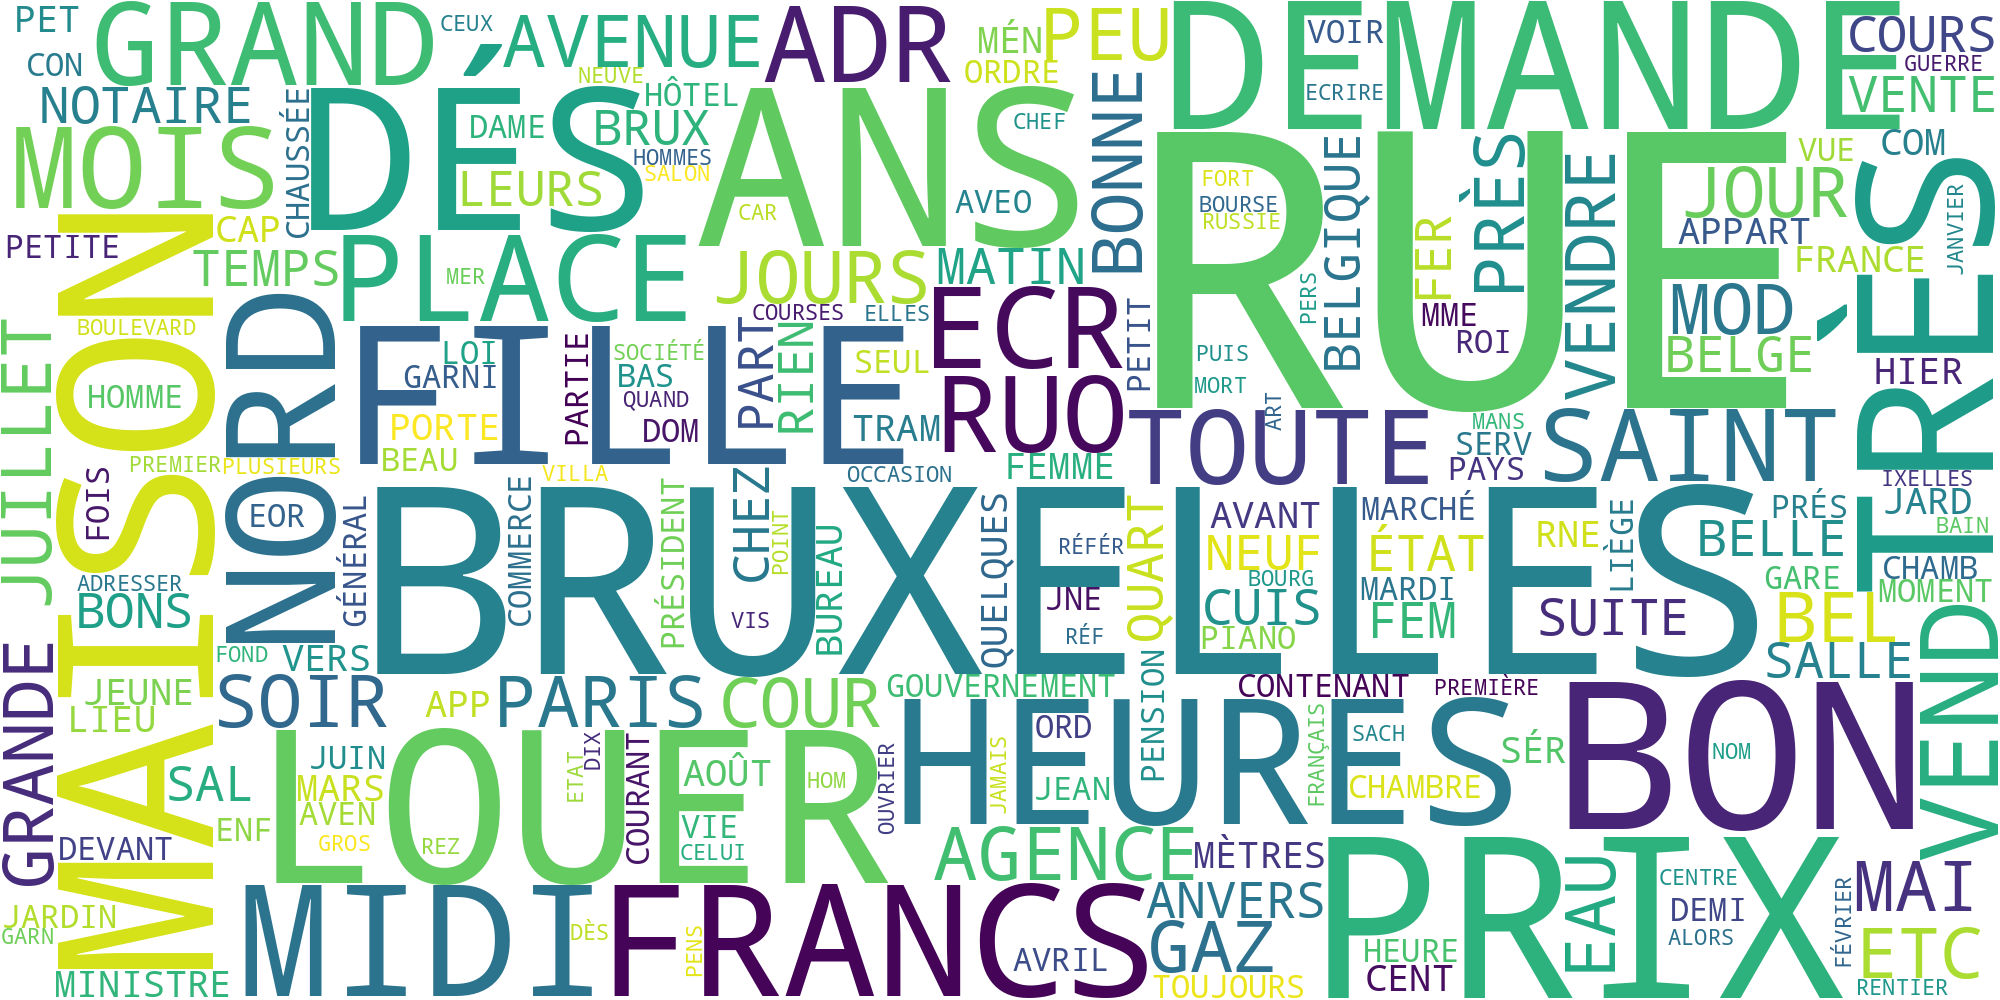

In [16]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))